# CAPÍTULO 5: FEATURE ENGINEERING Y SELECCIÓN


In [ ]:
# Importar configuración compartida y utilidades
import sys
sys.path.append('..')
from config import *
from utils.data_loader import load_data_product, save_data_product

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif
import joblib


In [ ]:
# Cargar datos del capítulo anterior
print("Cargando datos del Capítulo 4...")

split_data = load_data_product('train_test_split.pkl')
X_train = split_data['X_train']
X_test = split_data['X_test']
y_train = split_data['y_train']
y_test = split_data['y_test']

print(f"\nX_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")



DIVISIÓN DEL DATASET

📊 Dimensiones:
--------------------------------------------------------------------------------
• Features (X): (303, 13)
• Target (y): (303,)
• Total variables predictoras: 13

📋 Variables predictoras:
--------------------------------------------------------------------------------
    1. age
    2. sex
    3. cp
    4. trestbps
    5. chol
    6. fbs
    7. restecg
    8. thalach
    9. exang
   10. oldpeak
   11. slope
   12. ca
   13. thal
--------------------------------------------------------------------------------

✅ División estratificada completada:
--------------------------------------------------------------------------------
• Training set: 242 muestras (79.9%)
• Test set:     61 muestras (20.1%)
• Test size:    0.2
• Random state: 42
--------------------------------------------------------------------------------

📊 VERIFICACIÓN DE ESTRATIFICACIÓN:
--------------------------------------------------------------------------------

Distribución en TR

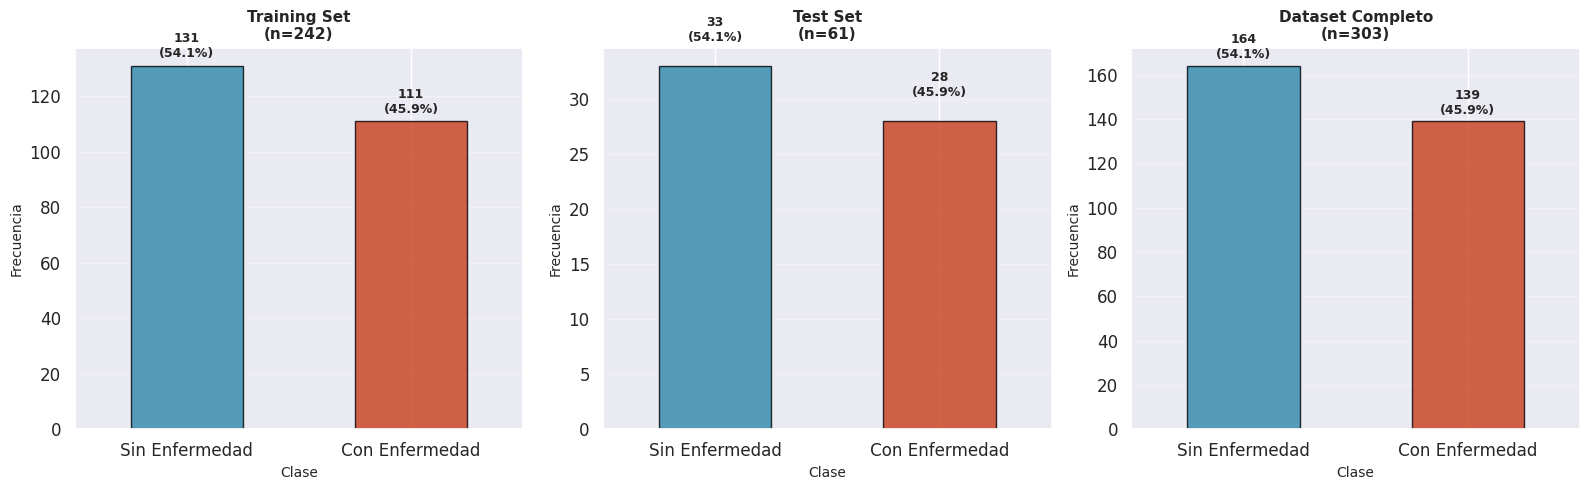


✓ Figura guardada: outputs/10_train_test_split.png


In [19]:
# ============================================================================
# DIVISIÓN DEL DATASET
# ============================================================================

print("\n" + "="*80)
print("DIVISIÓN DEL DATASET")
print("="*80)

# Separar features y target
X = df_processed.drop(['num', 'target'], axis=1)
y = df_processed['target']

print(f"\n📊 Dimensiones:")
print("-"*80)
print(f"• Features (X): {X.shape}")
print(f"• Target (y): {y.shape}")
print(f"• Total variables predictoras: {X.shape[1]}")

# Lista de features
print(f"\n📋 Variables predictoras:")
print("-"*80)
for i, col in enumerate(X.columns, 1):
    print(f"   {i:2d}. {col}")
print("-"*80)

# División estratificada
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
    stratify=y
)

print(f"\n✅ División estratificada completada:")
print("-"*80)
print(f"• Training set: {X_train.shape[0]} muestras ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"• Test set:     {X_test.shape[0]} muestras ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"• Test size:    {TEST_SIZE}")
print(f"• Random state: {RANDOM_STATE}")
print("-"*80)

# Verificar estratificación
print(f"\n📊 VERIFICACIÓN DE ESTRATIFICACIÓN:")
print("-"*80)

print("\nDistribución en TRAINING set:")
train_dist = y_train.value_counts().sort_index()
for val, count in train_dist.items():
    pct = (count / len(y_train)) * 100
    label = "Sin enfermedad" if val == 0 else "Con enfermedad"
    print(f"   Clase {val} ({label:16s}): {count:3d} ({pct:5.2f}%)")

print("\nDistribución en TEST set:")
test_dist = y_test.value_counts().sort_index()
for val, count in test_dist.items():
    pct = (count / len(y_test)) * 100
    label = "Sin enfermedad" if val == 0 else "Con enfermedad"
    print(f"   Clase {val} ({label:16s}): {count:3d} ({pct:5.2f}%)")

print("\nDistribución en DATASET COMPLETO:")
full_dist = y.value_counts().sort_index()
for val, count in full_dist.items():
    pct = (count / len(y)) * 100
    label = "Sin enfermedad" if val == 0 else "Con enfermedad"
    print(f"   Clase {val} ({label:16s}): {count:3d} ({pct:5.2f}%)")

# Comparación de proporciones
print("\n📈 Comparación de proporciones (Clase 1 - Con enfermedad):")
print("-"*80)
train_pct = (train_dist[1] / len(y_train)) * 100
test_pct = (test_dist[1] / len(y_test)) * 100
full_pct = (full_dist[1] / len(y)) * 100
diff_train = abs(train_pct - full_pct)
diff_test = abs(test_pct - full_pct)

print(f"   Dataset completo: {full_pct:.2f}%")
print(f"   Training set:     {train_pct:.2f}% (diferencia: {diff_train:.2f}%)")
print(f"   Test set:         {test_pct:.2f}% (diferencia: {diff_test:.2f}%)")

if diff_train < 2 and diff_test < 2:
    print("\n✅ EXCELENTE: Estratificación perfecta (diferencias < 2%)")
elif diff_train < 5 and diff_test < 5:
    print("\n✅ BUENA: Estratificación adecuada (diferencias < 5%)")
else:
    print("\n⚠️  ADVERTENCIA: Estratificación subóptima (diferencias > 5%)")

print("="*80)

# Visualización
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

datasets = [
    (y_train, 'Training Set', train_dist),
    (y_test, 'Test Set', test_dist),
    (y, 'Dataset Completo', full_dist)
]

for idx, (data, title, dist) in enumerate(datasets):
    dist.plot(kind='bar', ax=axes[idx], color=[COLOR_PALETTE[0], COLOR_PALETTE[3]],
              edgecolor='black', alpha=0.8)
    axes[idx].set_title(f'{title}\n(n={len(data)})', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel('Clase', fontsize=10)
    axes[idx].set_ylabel('Frecuencia', fontsize=10)
    axes[idx].set_xticklabels(['Sin Enfermedad', 'Con Enfermedad'], rotation=0)
    axes[idx].grid(alpha=0.3, axis='y')

    # Agregar valores
    for i, v in enumerate(dist):
        pct = (v / len(data)) * 100
        axes[idx].text(i, v + 2, f'{v}\n({pct:.1f}%)',
                      ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig(f'{OUTPUT_DIR}/10_train_test_split.png', dpi=DPI_SAVE, bbox_inches='tight')
plt.show()

print(f"\n✓ Figura guardada: {OUTPUT_DIR}/10_train_test_split.png")

<a id='45-scaling'></a>
## 4.5 Escalamiento de Variables

### Estrategia de Escalamiento

**Consideraciones importantes:**
- ✅ **Modelos que REQUIEREN escalamiento**: Logistic Regression, SVM, KNN
- ❌ **Modelos que NO requieren escalamiento**: Random Forest, XGBoost, LightGBM, CatBoost

**Decisión:** Se crearán **DOS versiones** de los datos:
1. **Datos sin escalar**: Para modelos tree-based (RF, XGBoost, LightGBM, CatBoost)
2. **Datos escalados**: Para Logistic Regression

**Método seleccionado:** StandardScaler (estandarización z-score)
- Fórmula: z = (x - μ) / σ
- Resultado: Media = 0, Desviación estándar = 1


ESCALAMIENTO DE VARIABLES

📋 Variables a escalar (5):
--------------------------------------------------------------------------------
   • age
   • trestbps
   • chol
   • thalach
   • oldpeak
--------------------------------------------------------------------------------

📋 Variables que NO se escalan (8):
--------------------------------------------------------------------------------
   • sex (categórica - mantener valores originales)
   • cp (categórica - mantener valores originales)
   • fbs (categórica - mantener valores originales)
   • restecg (categórica - mantener valores originales)
   • exang (categórica - mantener valores originales)
   • slope (categórica - mantener valores originales)
   • ca (categórica - mantener valores originales)
   • thal (categórica - mantener valores originales)
--------------------------------------------------------------------------------

🔄 Creando dos versiones de los datos:
----------------------------------------------------------------

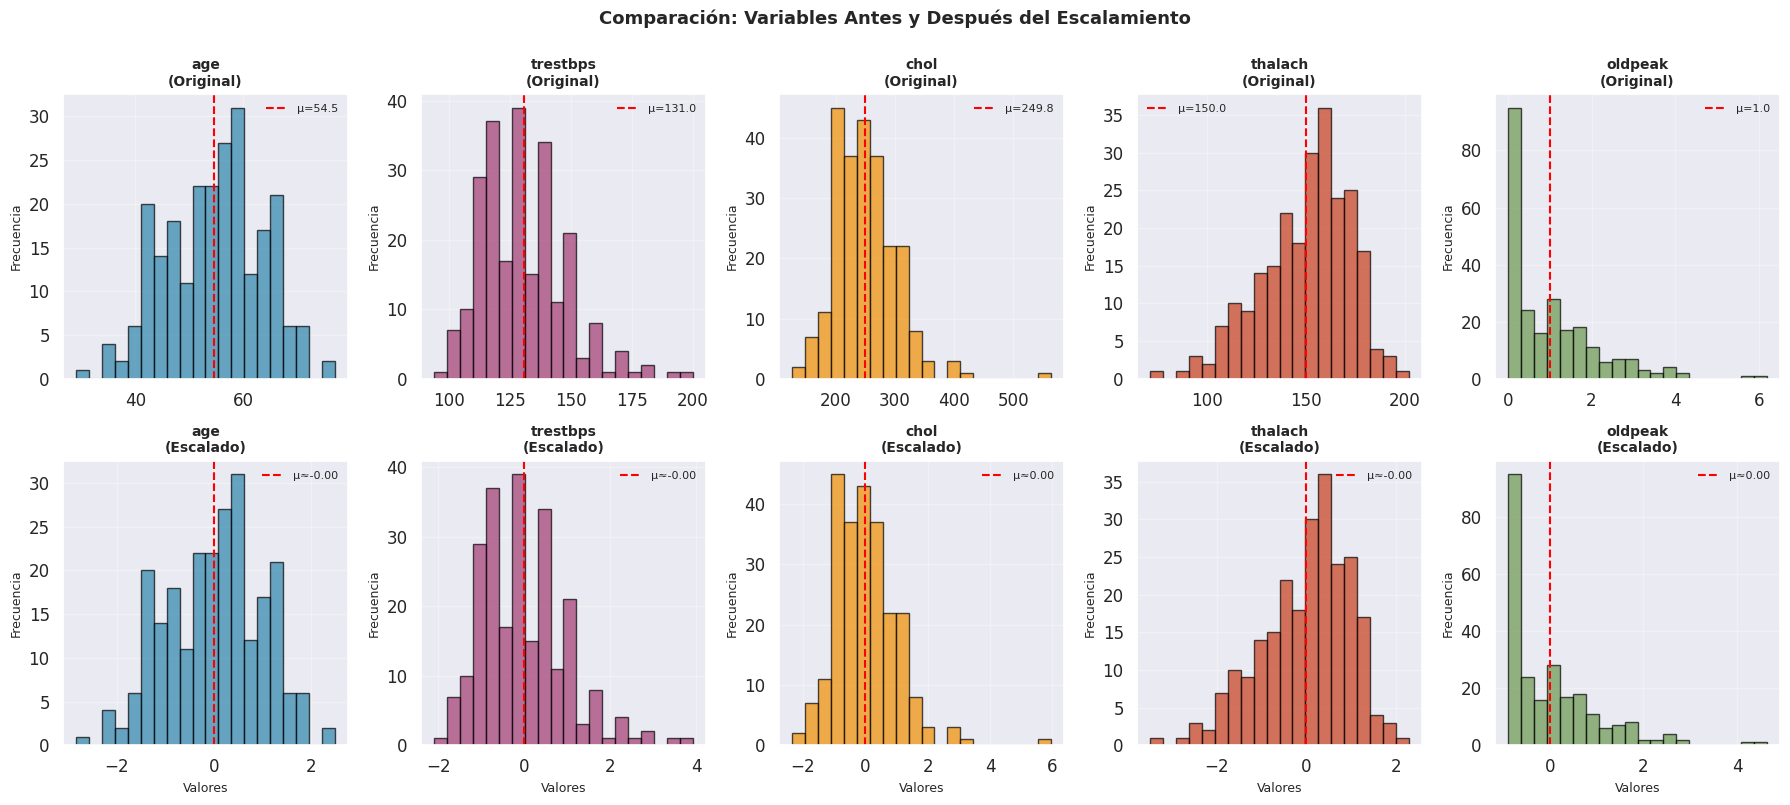


✓ Figura guardada: outputs/11_scaling_comparison.png
✓ Scaler guardado en: models/scaler.pkl

RESUMEN DE DATASETS DISPONIBLES

📦 DATASETS CREADOS:

1️⃣  DATOS SIN ESCALAR (para modelos tree-based):
    • X_train_no_scaled: (242, 13)
    • X_test_no_scaled:  (61, 13)
    • Usar con: Random Forest, XGBoost, LightGBM, CatBoost

2️⃣  DATOS ESCALADOS (para modelos lineales):
    • X_train_scaled: (242, 13)
    • X_test_scaled:  (61, 13)
    • Usar con: Logistic Regression

🎯 TARGET (mismo para ambos):
    • y_train: (242,)
    • y_test:  (61,)



In [20]:
# ============================================================================
# ESCALAMIENTO DE VARIABLES
# ============================================================================

print("\n" + "="*80)
print("ESCALAMIENTO DE VARIABLES")
print("="*80)

# Variables a escalar (solo continuas)
features_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

print(f"\n📋 Variables a escalar ({len(features_to_scale)}):")
print("-"*80)
for var in features_to_scale:
    print(f"   • {var}")
print("-"*80)

print(f"\n📋 Variables que NO se escalan ({X_train.shape[1] - len(features_to_scale)}):")
print("-"*80)
categorical_in_model = [col for col in X_train.columns if col not in features_to_scale]
for var in categorical_in_model:
    print(f"   • {var} (categórica - mantener valores originales)")
print("-"*80)

# Crear copias para las dos versiones
print("\n🔄 Creando dos versiones de los datos:")
print("-"*80)

# Versión 1: Sin escalar (para modelos tree-based)
X_train_no_scaled = X_train.copy()
X_test_no_scaled = X_test.copy()
print("✓ Versión 1: Datos SIN ESCALAR (para Random Forest, XGBoost, LightGBM, CatBoost)")

# Versión 2: Con escalamiento (para Logistic Regression)
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Aplicar StandardScaler solo a variables continuas
scaler = StandardScaler()
X_train_scaled[features_to_scale] = scaler.fit_transform(X_train[features_to_scale])
X_test_scaled[features_to_scale] = scaler.transform(X_test[features_to_scale])

print("✓ Versión 2: Datos ESCALADOS (para Logistic Regression)")
print("-"*80)

# Verificar escalamiento
print("\n📊 VERIFICACIÓN DEL ESCALAMIENTO (Training set):")
print("-"*80)
print("\nEstadísticas ANTES del escalamiento:")
stats_before = X_train[features_to_scale].describe().loc[['mean', 'std']].T
print(stats_before.round(3))

print("\nEstadísticas DESPUÉS del escalamiento:")
stats_after = X_train_scaled[features_to_scale].describe().loc[['mean', 'std']].T
print(stats_after.round(3))

print("\n✅ Verificación: Media ≈ 0, Desviación estándar ≈ 1")
print("="*80)

# Visualización comparativa
fig, axes = plt.subplots(2, len(features_to_scale), figsize=(18, 8))

for idx, var in enumerate(features_to_scale):
    # Antes del escalamiento
    axes[0, idx].hist(X_train[var], bins=20, edgecolor='black', alpha=0.7,
                      color=COLOR_PALETTE[idx % len(COLOR_PALETTE)])
    axes[0, idx].set_title(f'{var}\n(Original)', fontsize=10, fontweight='bold')
    axes[0, idx].set_ylabel('Frecuencia', fontsize=9)
    axes[0, idx].grid(alpha=0.3)

    # Estadísticas
    mean_orig = X_train[var].mean()
    std_orig = X_train[var].std()
    axes[0, idx].axvline(mean_orig, color='red', linestyle='--', linewidth=1.5,
                         label=f'μ={mean_orig:.1f}')
    axes[0, idx].legend(fontsize=8)

    # Después del escalamiento
    axes[1, idx].hist(X_train_scaled[var], bins=20, edgecolor='black', alpha=0.7,
                      color=COLOR_PALETTE[idx % len(COLOR_PALETTE)])
    axes[1, idx].set_title(f'{var}\n(Escalado)', fontsize=10, fontweight='bold')
    axes[1, idx].set_xlabel('Valores', fontsize=9)
    axes[1, idx].set_ylabel('Frecuencia', fontsize=9)
    axes[1, idx].grid(alpha=0.3)

    # Estadísticas
    mean_scaled = X_train_scaled[var].mean()
    std_scaled = X_train_scaled[var].std()
    axes[1, idx].axvline(mean_scaled, color='red', linestyle='--', linewidth=1.5,
                         label=f'μ≈{mean_scaled:.2f}')
    axes[1, idx].legend(fontsize=8)

plt.suptitle('Comparación: Variables Antes y Después del Escalamiento',
             fontsize=13, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig(f'{OUTPUT_DIR}/11_scaling_comparison.png', dpi=DPI_SAVE, bbox_inches='tight')
plt.show()

print(f"\n✓ Figura guardada: {OUTPUT_DIR}/11_scaling_comparison.png")

# Guardar el scaler para uso futuro
import joblib
scaler_path = f'{MODELS_DIR}/scaler.pkl'
joblib.dump(scaler, scaler_path)
print(f"✓ Scaler guardado en: {scaler_path}")

print("\n" + "="*80)
print("RESUMEN DE DATASETS DISPONIBLES")
print("="*80)
print(f"""
📦 DATASETS CREADOS:

1️⃣  DATOS SIN ESCALAR (para modelos tree-based):
    • X_train_no_scaled: {X_train_no_scaled.shape}
    • X_test_no_scaled:  {X_test_no_scaled.shape}
    • Usar con: Random Forest, XGBoost, LightGBM, CatBoost

2️⃣  DATOS ESCALADOS (para modelos lineales):
    • X_train_scaled: {X_train_scaled.shape}
    • X_test_scaled:  {X_test_scaled.shape}
    • Usar con: Logistic Regression

🎯 TARGET (mismo para ambos):
    • y_train: {y_train.shape}
    • y_test:  {y_test.shape}
""")
print("="*80)

<a id='46-resumen'></a>
## 4.6 Resumen del Preprocesamiento

### Transformaciones Aplicadas

✅ **Completado:**
1. **Valores faltantes**: No requirieron imputación (dataset completo)
2. **Outliers**: Conservados por relevancia clínica
3. **Variable objetivo**: Transformada a binaria (0 vs 1)
4. **División de datos**: 80% train (242 muestras), 20% test (61 muestras)
5. **Estratificación**: Mantenida proporción de clases
6. **Escalamiento**: Dos versiones creadas (escalada y sin escalar)

### Datasets Resultantes

| Dataset | Dimensiones | Uso |
|---------|-------------|-----|
| `X_train_no_scaled` | 242 × 13 | Random Forest, XGBoost, LightGBM, CatBoost |
| `X_test_no_scaled` | 61 × 13 | Evaluación de modelos tree-based |
| `X_train_scaled` | 242 × 13 | Logistic Regression |
| `X_test_scaled` | 61 × 13 | Evaluación de Logistic Regression |
| `y_train` | 242 | Target para entrenamiento |
| `y_test` | 61 | Target para evaluación |

### Próximos Pasos

- Feature Engineering (opcional)
- Feature Selection
- Entrenamiento de modelos

In [21]:
# Código para verificación final
print("\n" + "="*80)
print("VERIFICACIÓN FINAL DE PREPROCESAMIENTO")
print("="*80)

checks = []

# Check 1: No hay valores faltantes
check_missing = df_processed.isnull().sum().sum() == 0
checks.append(("No valores faltantes", check_missing))

# Check 2: Variable target binaria creada
check_target = 'target' in df_processed.columns and df_processed['target'].nunique() == 2
checks.append(("Variable target binaria", check_target))

# Check 3: División completada
check_split = len(X_train) + len(X_test) == len(X)
checks.append(("División train-test correcta", check_split))

# Check 4: Estratificación mantenida
train_pct = (y_train.sum() / len(y_train))
full_pct = (y.sum() / len(y))
check_stratify = abs(train_pct - full_pct) < 0.05
checks.append(("Estratificación correcta", check_stratify))

# Check 5: Escalamiento aplicado correctamente
check_scaling = abs(X_train_scaled[features_to_scale].mean().mean()) < 0.1
checks.append(("Escalamiento correcto", check_scaling))

# Check 6: Dimensiones consistentes
check_dims = X_train.shape[1] == X_test.shape[1] == X_train_scaled.shape[1] == X_test_scaled.shape[1]
checks.append(("Dimensiones consistentes", check_dims))

print("\n📋 Checklist de verificación:")
print("-"*80)
for check_name, passed in checks:
    status = "✅" if passed else "❌"
    print(f"{status} {check_name}")

all_passed = all(passed for _, passed in checks)

if all_passed:
    print("\n" + "="*80)
    print("✅✅✅ PREPROCESAMIENTO COMPLETADO EXITOSAMENTE ✅✅✅")
    print("="*80)
    print("\n🚀 Listo para Feature Engineering y Modelado")
else:
    print("\n⚠️  ADVERTENCIA: Algunos checks fallaron. Revisar antes de continuar.")

print("="*80)


VERIFICACIÓN FINAL DE PREPROCESAMIENTO

📋 Checklist de verificación:
--------------------------------------------------------------------------------
✅ No valores faltantes
✅ Variable target binaria
✅ División train-test correcta
✅ Estratificación correcta
✅ Escalamiento correcto
✅ Dimensiones consistentes

✅✅✅ PREPROCESAMIENTO COMPLETADO EXITOSAMENTE ✅✅✅

🚀 Listo para Feature Engineering y Modelado


<a id='51-engineering'></a>
## 5.1 Feature Engineering

Creación de nuevas variables basadas en conocimiento clínico y relaciones conocidas entre factores de riesgo cardiovascular.

### Justificación de Nuevas Features

Las nuevas variables se fundamentan en:
- **Literatura médica**: Indicadores de riesgo validados clínicamente
- **Interacciones conocidas**: Relaciones entre edad, presión arterial, colesterol
- **Categorización clínica**: Rangos de riesgo establecidos por guías médicas


FEATURE ENGINEERING

🔬 Aplicando feature engineering...
--------------------------------------------------------------------------------

✅ Feature Engineering completado
   • Features originales: 13
   • Features nuevas: 8
   • Total features: 21

📋 Nuevas features creadas:
--------------------------------------------------------------------------------
   • chol_age_ratio            : Ratio Colesterol/Edad          (Riesgo ajustado por edad)
   • bp_category               : Categoría de Presión Arterial  (0=Normal, 1=Elevada, 2=HTA-1, 3=HTA-2)
   • heart_rate_reserve        : Reserva Cardíaca               (220-edad - FC máxima alcanzada)
   • high_risk_multi           : Alto Riesgo Múltiple           (≥2 factores de riesgo mayores)
   • age_group                 : Grupo de Edad                  (0=<45, 1=45-54, 2=55-64, 3=≥65)
   • age_sex_interaction       : Interacción Edad×Sexo          (Riesgo diferencial por género)
   • st_depression_severity    : Severidad Depresión ST      

,count,mean,std,min,25%,50%,75%,max
chol_age_ratio,242.0,4.675,1.088,2.099,3.911,4.578,5.333,8.418
bp_category,242.0,1.293,1.160,0.000,0.000,1.000,2.000,3.000
heart_rate_reserve,242.0,15.488,20.840,-29.000,0.000,11.000,27.000,82.000
high_risk_multi,242.0,0.219,0.414,0.000,0.000,0.000,0.000,1.000
age_group,242.0,1.421,0.927,0.000,1.000,2.000,2.000,3.000
age_sex_interaction,242.0,36.802,26.185,0.000,0.000,48.000,57.000,77.000
st_depression_severity,242.0,0.537,0.729,0.000,0.000,0.000,1.000,2.000
functional_capacity,242.0,0.906,0.127,0.464,0.840,0.936,1.000,1.175


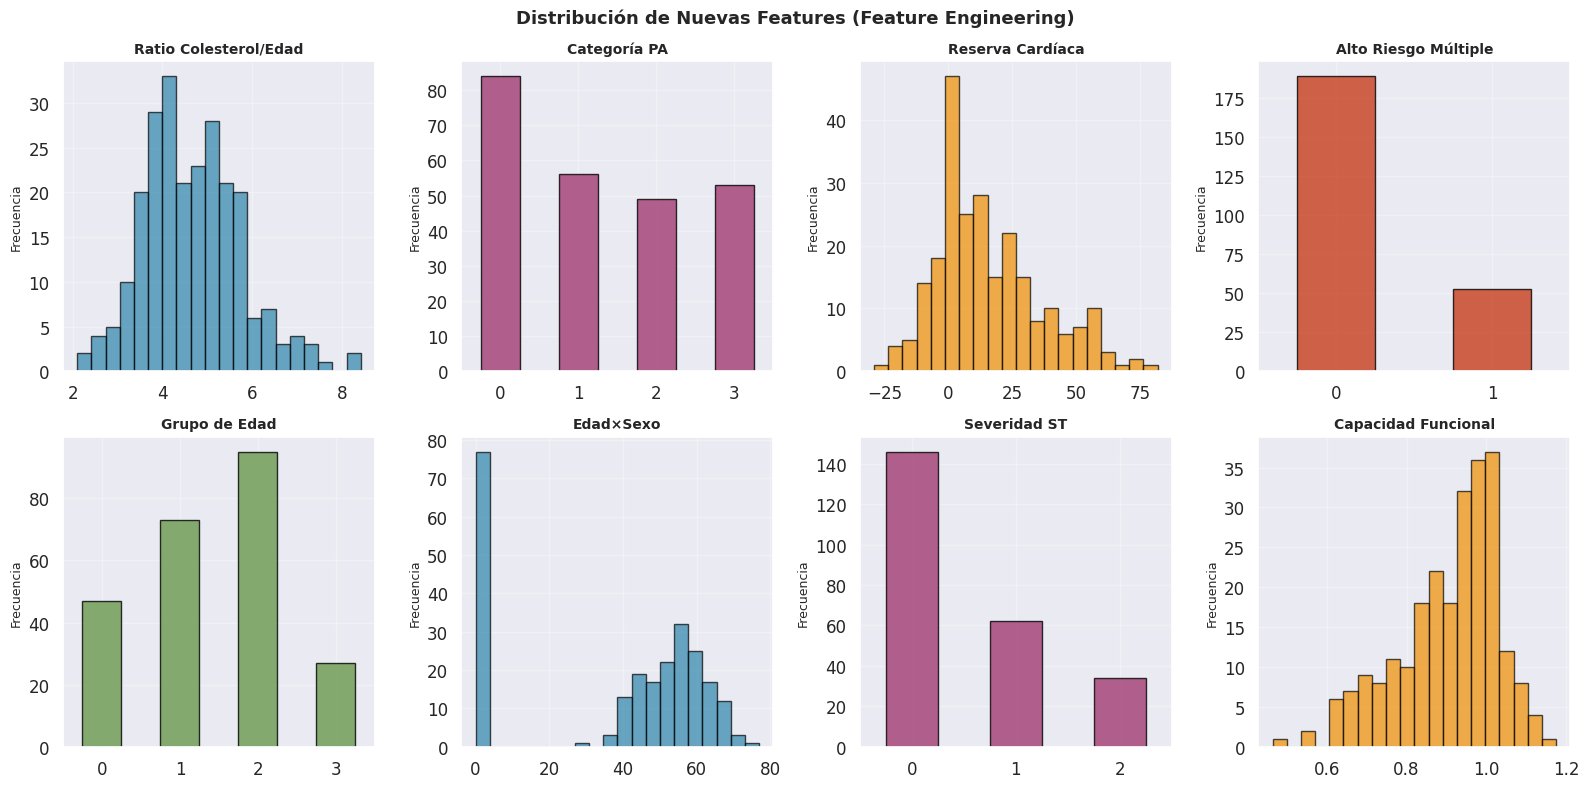


✓ Figura guardada: outputs/12_new_features_distributions.png


In [22]:
# ============================================================================
# FEATURE ENGINEERING - VERSIÓN CORREGIDA
# ============================================================================

print("\n" + "="*80)
print("FEATURE ENGINEERING")
print("="*80)

def create_clinical_features(df):
    """
    Crea features basadas en conocimiento clínico cardiovascular.

    Parámetros:
    -----------
    df : DataFrame
        Dataset con variables originales

    Returns:
    --------
    df_fe : DataFrame
        Dataset con features adicionales
    """
    df_fe = df.copy()

    # -------------------------------------------------------------------------
    # FEATURE 1: Ratio Colesterol/Edad
    # -------------------------------------------------------------------------
    df_fe['chol_age_ratio'] = df_fe['chol'] / df_fe['age']

    # -------------------------------------------------------------------------
    # FEATURE 2: Categorización de Presión Arterial
    # -------------------------------------------------------------------------
    # CORRECCIÓN: Manejar NaN antes de convertir a int
    df_fe['bp_category'] = pd.cut(df_fe['trestbps'],
                                   bins=[0, 120, 130, 140, 200],
                                   labels=[0, 1, 2, 3],
                                   include_lowest=True)
    # Convertir a float primero, luego a int (maneja NaN automáticamente)
    df_fe['bp_category'] = df_fe['bp_category'].cat.codes

    # df_fe['bp_category'] = df_fe['bp_category'].replace(-1, 0)

    # -------------------------------------------------------------------------
    # FEATURE 3: Reserva Cardíaca
    # -------------------------------------------------------------------------
    df_fe['heart_rate_reserve'] = (220 - df_fe['age']) - df_fe['thalach']

    # -------------------------------------------------------------------------
    # FEATURE 4: Indicador de Alto Riesgo (Múltiples Factores)
    # -------------------------------------------------------------------------
    risk_factors = (
        (df_fe['chol'] > 240).astype(int) +
        (df_fe['trestbps'] > 140).astype(int) +
        (df_fe['fbs'] == 1).astype(int)
    )
    df_fe['high_risk_multi'] = (risk_factors >= 2).astype(int)

    # -------------------------------------------------------------------------
    # FEATURE 5: Categorización de Edad
    # -------------------------------------------------------------------------
    # CORRECCIÓN: Igual que bp_category
    df_fe['age_group'] = pd.cut(df_fe['age'],
                                 bins=[0, 45, 55, 65, 100],
                                 labels=[0, 1, 2, 3],
                                 include_lowest=True)
    df_fe['age_group'] = df_fe['age_group'].cat.codes

    # -------------------------------------------------------------------------
    # FEATURE 6: Interacción Edad × Sexo
    # -------------------------------------------------------------------------
    df_fe['age_sex_interaction'] = df_fe['age'] * df_fe['sex']

    # -------------------------------------------------------------------------
    # FEATURE 7: Severidad de Depresión ST
    # -------------------------------------------------------------------------
    # CORRECCIÓN: Igual que anteriores
    df_fe['st_depression_severity'] = pd.cut(df_fe['oldpeak'],
                                              bins=[-0.1, 1.0, 2.0, 10],
                                              labels=[0, 1, 2],
                                              include_lowest=True)
    df_fe['st_depression_severity'] = df_fe['st_depression_severity'].cat.codes

    # -------------------------------------------------------------------------
    # FEATURE 8: Capacidad Funcional
    # -------------------------------------------------------------------------
    df_fe['functional_capacity'] = df_fe['thalach'] / (220 - df_fe['age'])

    return df_fe

# Aplicar feature engineering a todos los datasets
print("\n🔬 Aplicando feature engineering...")
print("-"*80)

X_train_no_scaled_fe = create_clinical_features(X_train_no_scaled)
X_test_no_scaled_fe = create_clinical_features(X_test_no_scaled)
X_train_scaled_fe = create_clinical_features(X_train_scaled)
X_test_scaled_fe = create_clinical_features(X_test_scaled)

# Features creadas
new_features = [col for col in X_train_no_scaled_fe.columns if col not in X_train_no_scaled.columns]

print(f"\n✅ Feature Engineering completado")
print(f"   • Features originales: {X_train_no_scaled.shape[1]}")
print(f"   • Features nuevas: {len(new_features)}")
print(f"   • Total features: {X_train_no_scaled_fe.shape[1]}")

print(f"\n📋 Nuevas features creadas:")
print("-"*80)
feature_descriptions = [
    ("chol_age_ratio", "Ratio Colesterol/Edad", "Riesgo ajustado por edad"),
    ("bp_category", "Categoría de Presión Arterial", "0=Normal, 1=Elevada, 2=HTA-1, 3=HTA-2"),
    ("heart_rate_reserve", "Reserva Cardíaca", "220-edad - FC máxima alcanzada"),
    ("high_risk_multi", "Alto Riesgo Múltiple", "≥2 factores de riesgo mayores"),
    ("age_group", "Grupo de Edad", "0=<45, 1=45-54, 2=55-64, 3=≥65"),
    ("age_sex_interaction", "Interacción Edad×Sexo", "Riesgo diferencial por género"),
    ("st_depression_severity", "Severidad Depresión ST", "0=Leve, 1=Moderada, 2=Severa"),
    ("functional_capacity", "Capacidad Funcional", "FC alcanzada / FC teórica"),
]

for feat, name, description in feature_descriptions:
    print(f"   • {feat:<25} : {name:<30} ({description})")

print("-"*80)

# Verificar si hay NaN en las nuevas features
print("\n🔍 Verificación de valores faltantes en nuevas features:")
print("-"*80)
missing_in_new = X_train_no_scaled_fe[new_features].isnull().sum()
if missing_in_new.sum() > 0:
    print("⚠️  Se detectaron valores faltantes:")
    print(missing_in_new[missing_in_new > 0])
    print("\n🔧 Aplicando imputación con mediana para features continuas...")

    # Imputar features continuas con mediana
    continuous_new_features = ['chol_age_ratio', 'heart_rate_reserve',
                               'age_sex_interaction', 'functional_capacity']
    for feat in continuous_new_features:
        if feat in new_features:
            median_val = X_train_no_scaled_fe[feat].median()
            X_train_no_scaled_fe[feat].fillna(median_val, inplace=True)
            X_test_no_scaled_fe[feat].fillna(median_val, inplace=True)
            X_train_scaled_fe[feat].fillna(median_val, inplace=True)
            X_test_scaled_fe[feat].fillna(median_val, inplace=True)

    # Imputar features categóricas con moda
    categorical_new_features = ['bp_category', 'age_group', 'st_depression_severity', 'high_risk_multi']
    for feat in categorical_new_features:
        if feat in new_features:
            mode_val = X_train_no_scaled_fe[feat].mode()[0]
            X_train_no_scaled_fe[feat].fillna(mode_val, inplace=True)
            X_test_no_scaled_fe[feat].fillna(mode_val, inplace=True)
            X_train_scaled_fe[feat].fillna(mode_val, inplace=True)
            X_test_scaled_fe[feat].fillna(mode_val, inplace=True)

    print("✓ Imputación completada")
else:
    print("✓ No hay valores faltantes en las nuevas features")

# Estadísticas de nuevas features
print("\n📊 Estadísticas descriptivas de nuevas features:")
print("-"*80)
display(X_train_no_scaled_fe[new_features].describe().T.round(3))

print("="*80)

# Visualización de algunas features nuevas
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

features_to_plot = [
    ('chol_age_ratio', 'Ratio Colesterol/Edad'),
    ('bp_category', 'Categoría PA'),
    ('heart_rate_reserve', 'Reserva Cardíaca'),
    ('high_risk_multi', 'Alto Riesgo Múltiple'),
    ('age_group', 'Grupo de Edad'),
    ('age_sex_interaction', 'Edad×Sexo'),
    ('st_depression_severity', 'Severidad ST'),
    ('functional_capacity', 'Capacidad Funcional')
]

for idx, (feat, title) in enumerate(features_to_plot):
    # Verificar si la feature existe
    if feat not in X_train_no_scaled_fe.columns:
        axes[idx].text(0.5, 0.5, 'Feature no disponible', ha='center', va='center')
        axes[idx].set_title(f'{title}', fontsize=10, fontweight='bold')
        continue

    if X_train_no_scaled_fe[feat].nunique() <= 4:
        # Variables categóricas - gráfico de barras
        X_train_no_scaled_fe[feat].value_counts().sort_index().plot(
            kind='bar', ax=axes[idx], color=COLOR_PALETTE[idx % len(COLOR_PALETTE)],
            edgecolor='black', alpha=0.8
        )
        axes[idx].set_title(f'{title}', fontsize=10, fontweight='bold')
        axes[idx].set_xlabel('')
        axes[idx].set_ylabel('Frecuencia', fontsize=9)
        axes[idx].tick_params(axis='x', rotation=0)
    else:
        # Variables continuas - histograma
        axes[idx].hist(X_train_no_scaled_fe[feat].dropna(), bins=20,
                      color=COLOR_PALETTE[idx % len(COLOR_PALETTE)],
                      edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'{title}', fontsize=10, fontweight='bold')
        axes[idx].set_xlabel('')
        axes[idx].set_ylabel('Frecuencia', fontsize=9)

    axes[idx].grid(alpha=0.3)

plt.suptitle('Distribución de Nuevas Features (Feature Engineering)',
             fontsize=13, fontweight='bold')
plt.tight_layout()
plt.savefig(f'{OUTPUT_DIR}/12_new_features_distributions.png', dpi=DPI_SAVE, bbox_inches='tight')
plt.show()

print(f"\n✓ Figura guardada: {OUTPUT_DIR}/12_new_features_distributions.png")

<a id='52-selection'></a>
## 5.2 Feature Selection

Selección de las features más relevantes mediante métodos estadísticos univariados.

### Métodos Utilizados

1. **SelectKBest con F-Score (ANOVA)**: Mide la dependencia lineal entre cada feature y el target
2. **Mutual Information**: Captura relaciones no lineales
3. **Score Combinado**: Promedio normalizado de ambos métodos

In [ ]:
# ============================================================================
# FEATURE SELECTION
# ============================================================================

print("\n" + "="*80)
print("FEATURE SELECTION")
print("="*80)

print("\n🎯 Objetivo: Seleccionar las features más importantes mediante métodos estadísticos")
print("-"*80)

# Usar los datasets con feature engineering
print(f"\n📊 Dataset con todas las features:")
print(f"   • Total features: {X_train_no_scaled_fe.shape[1]}")

# Métodos de selección univariada
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

# Método 1: ANOVA F-test
selector_f = SelectKBest(f_classif, k='all')
selector_f.fit(X_train_no_scaled_fe, y_train)
f_scores = selector_f.scores_

# Método 2: Mutual Information
mi_scores = mutual_info_classif(X_train_no_scaled_fe, y_train, random_state=RANDOM_STATE)

# Combinar scores (normalizar y promediar)
from sklearn.preprocessing import MinMaxScaler
scaler_scores = MinMaxScaler()
f_scores_norm = scaler_scores.fit_transform(f_scores.reshape(-1, 1)).flatten()
mi_scores_norm = scaler_scores.fit_transform(mi_scores.reshape(-1, 1)).flatten()
combined_scores = (f_scores_norm + mi_scores_norm) / 2

# Crear DataFrame con scores
feature_importance = pd.DataFrame({
    'Feature': X_train_no_scaled_fe.columns,
    'F-Score': f_scores,
    'F-Score (norm)': f_scores_norm,
    'MI-Score': mi_scores,
    'MI-Score (norm)': mi_scores_norm,
    'Combined Score': combined_scores
}).sort_values('Combined Score', ascending=False)

print("\n📊 Top 15 Features por Score Combinado:")
print("-"*80)
display(feature_importance.head(15))

# Decisión: Usar las top K features o todas si el dataset es pequeño
# Para este proyecto con 13 features originales + 8 nuevas = 21 total
# Seleccionaremos las top 15 features
K_FEATURES = 15

selected_features = feature_importance.head(K_FEATURES)['Feature'].tolist()

print(f"\n✅ Features seleccionadas (Top {K_FEATURES}):")
print("-"*80)
for i, feat in enumerate(selected_features, 1):
    score = feature_importance[feature_importance['Feature'] == feat]['Combined Score'].values[0]
    print(f"   {i:2d}. {feat:<30} (Score: {score:.4f})")
print("-"*80)

# Crear datasets finales con features seleccionadas
print("\n🔧 Creando datasets finales con features seleccionadas...")
print("-"*80)

# Versión sin escalar (para modelos tree-based)
X_train_final_no_scaled = X_train_no_scaled_fe[selected_features].copy()
X_test_final_no_scaled = X_test_no_scaled_fe[selected_features].copy()
print(f"✓ Datasets sin escalar: {X_train_final_no_scaled.shape}")

# Versión escalada (para Logistic Regression)
X_train_final_scaled = X_train_scaled_fe[selected_features].copy()
X_test_final_scaled = X_test_scaled_fe[selected_features].copy()
print(f"✓ Datasets escalados: {X_train_final_scaled.shape}")

print("\n" + "="*80)
print("RESUMEN FINAL DE DATASETS")
print("="*80)
print(f'''
📦 DATASETS FINALES (con feature engineering y selection):

1️⃣  SIN ESCALAR (para Random Forest, XGBoost, LightGBM, CatBoost):
    • X_train_final_no_scaled: {X_train_final_no_scaled.shape}
    • X_test_final_no_scaled:  {X_test_final_no_scaled.shape}

2️⃣  ESCALADOS (para Logistic Regression):
    • X_train_final_scaled: {X_train_final_scaled.shape}
    • X_test_final_scaled:  {X_test_final_scaled.shape}

🎯 TARGET:
    • y_train: {y_train.shape}
    • y_test:  {y_test.shape}

📋 FEATURES SELECCIONADAS: {len(selected_features)}
''')
print("="*80)

# Visualización de importancia
fig, ax = plt.subplots(figsize=(12, 8))

# Top 20 features
top_features = feature_importance.head(20)

y_pos = np.arange(len(top_features))
ax.barh(y_pos, top_features['Combined Score'], color=COLOR_PALETTE[0], 
        edgecolor='black', alpha=0.8)

ax.set_yticks(y_pos)
ax.set_yticklabels(top_features['Feature'])
ax.invert_yaxis()
ax.set_xlabel('Combined Score (normalizado)', fontsize=11, fontweight='bold')
ax.set_title(f'Top 20 Features más Importantes\n(F-Score + Mutual Information)',
             fontsize=12, fontweight='bold')
ax.grid(alpha=0.3, axis='x')

# Marcar las features seleccionadas
for i in range(K_FEATURES):
    ax.get_yticklabels()[i].set_color('green')
    ax.get_yticklabels()[i].set_weight('bold')

ax.axhline(y=K_FEATURES-0.5, color='red', linestyle='--', linewidth=2, alpha=0.5,
           label=f'Top {K_FEATURES} seleccionadas')
ax.legend()

plt.tight_layout()
plt.savefig(f'{OUTPUT_DIR}/13_feature_importance.png', dpi=DPI_SAVE, bbox_inches='tight')
plt.show()

print(f"\n✓ Figura guardada: {OUTPUT_DIR}/13_feature_importance.png")
print("="*80)


In [ ]:
# Guardar productos de datos para los siguientes capítulos
print("\nGuardando productos de datos...")

# Guardar datasets escalados
save_data_product({
    'X_train_scaled': X_train_scaled,
    'X_test_scaled': X_test_scaled,
    'X_train_no_scaled': X_train_no_scaled,
    'X_test_no_scaled': X_test_no_scaled
}, 'scaled_data.pkl')

# Guardar datasets finales con features seleccionadas
save_data_product({
    'X_train_final_scaled': X_train_final_scaled,
    'X_test_final_scaled': X_test_final_scaled,
    'X_train_final_no_scaled': X_train_final_no_scaled,
    'X_test_final_no_scaled': X_test_final_no_scaled
}, 'final_datasets.pkl')

# Guardar lista de features seleccionadas
save_data_product(selected_features, 'selected_features.json', 'json')

print(f"\n✓ Datos guardados en: {PROCESSED_DATA_DIR}")
